In [90]:
# This script provides a modular framework to analyze economic indicators from FRED
# across presidential terms (Trump and Biden). It includes plotting trends and computing
# detailed statistical summaries for each term.

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from fredapi import Fred

plt.style.use('ggplot')
plt.style.use('dark_background')

# Initialize FRED API (replace with your actual key)
fred = Fred(api_key='cb13b116bf78b290ea691bbf95c189bf')

# -------------------- Helper Functions --------------------

def get_presidency_dates():
    return {
        "Trump": (datetime(2017, 1, 20), datetime(2021, 1, 20)),
        "Biden": (datetime(2021, 1, 20), datetime(2025, 1, 20))
    }

def fetch_fred_data(series_id):
    data = fred.get_series(series_id).dropna()
    data.index = pd.to_datetime(data.index)
    return data.sort_index()

def compute_metrics(series, start_date, end_date):
    subset = series[(series.index >= start_date) & (series.index <= end_date)]
    if subset.empty:
        return [None] * 10
    start = subset.iloc[0]
    end = subset.iloc[-1]
    avg = subset.mean()
    med = subset.median()
    std_dev = subset.std()
    max_val = subset.max()
    min_val = subset.min()
    pct_change = ((end - start) / start) * 100
    years = (end_date - start_date).days / 365.25
    ann_return = ((end / start) ** (1 / years) - 1) * 100 if start > 0 else None
    ann_volatility = std_dev * np.sqrt(12)
    return [round(start,2), round(end,2), round(avg,2), round(med,2), round(std_dev,2),
            round(max_val,2), round(min_val,2), round(pct_change,2),
            round(ann_return,2) if ann_return is not None else None,
            round(ann_volatility,2)]

# -------------------- Main Analysis Functions --------------------

def plot_of_metrics(metric_dict, title="Metric Trends: Trump vs. Biden"):
    dates = get_presidency_dates()
    trump_start, trump_end = dates["Trump"]
    biden_start, biden_end = dates["Biden"]

    for name, series_id in metric_dict.items():
        try:
            data = fetch_fred_data(series_id)
            filtered_data = data[(data.index >= trump_start) & (data.index <= biden_end)]

            fig, ax = plt.subplots(figsize=(12, 5))
            ax.plot(filtered_data.index, filtered_data.values, label=name, linewidth=2)
            ax.axvspan(trump_start, trump_end, color='red', alpha=0.2, label='Trump Term (2017–2021)')
            ax.axvspan(biden_start, biden_end, color='blue', alpha=0.2, label='Biden Term (2021–2025)')
            ax.set_title(f"{name} Trend (Trump vs. Biden)", fontsize=14)
            ax.set_xlabel("Date")
            ax.set_ylabel("Value")
            ax.legend()
            ax.grid(True, linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error fetching or plotting {name}: {e}")

def detailed_value_summary(metric_dict):
    dates = get_presidency_dates()
    trump_start, trump_end = dates["Trump"]
    biden_start, biden_end = dates["Biden"]

    results = []
    for name, series_id in metric_dict.items():
        try:
            data = fetch_fred_data(series_id)
            trump_stats = compute_metrics(data, trump_start, trump_end)
            biden_stats = compute_metrics(data, biden_start, biden_end)

            results.append([name, "Trump (2017–2021)", *trump_stats])
            results.append([name, "Biden (2021–2025)", *biden_stats])

        except Exception as e:
            print(f"Error computing summary for {name}: {e}")

    columns = [
        'Metric', 'Term', 'Start', 'End', 'Average', 'Median',
        'Std Dev', 'Max', 'Min', '% Change',
        'Annualized Return (%)', 'Annualized Volatility'
    ]
    return pd.DataFrame(results, columns=columns)


### Energy Prices

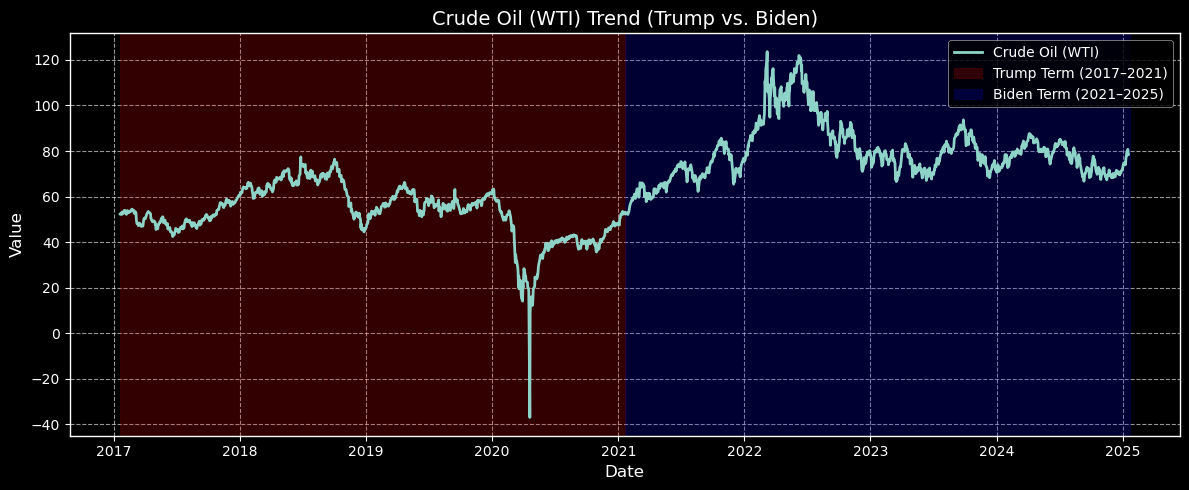

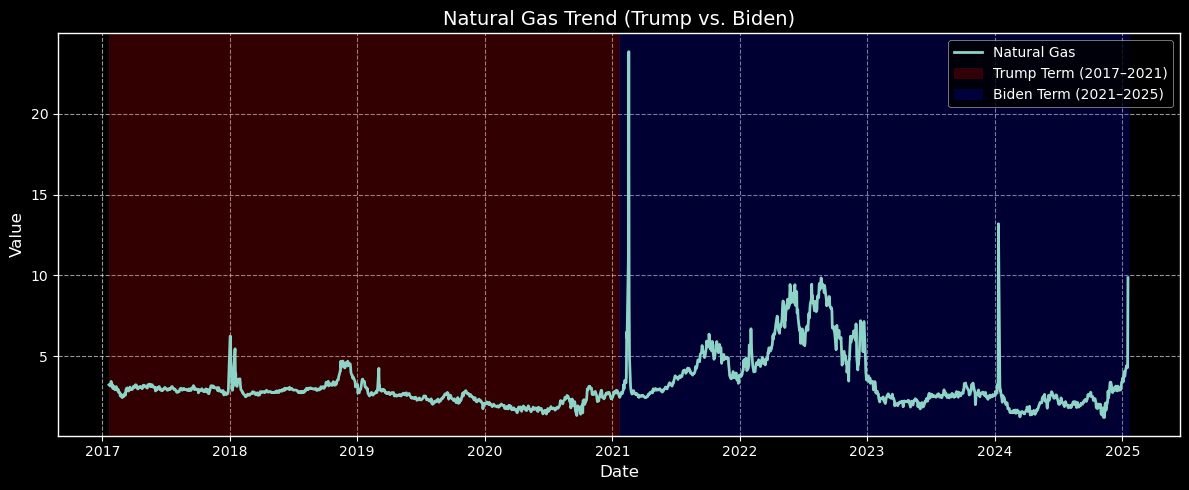

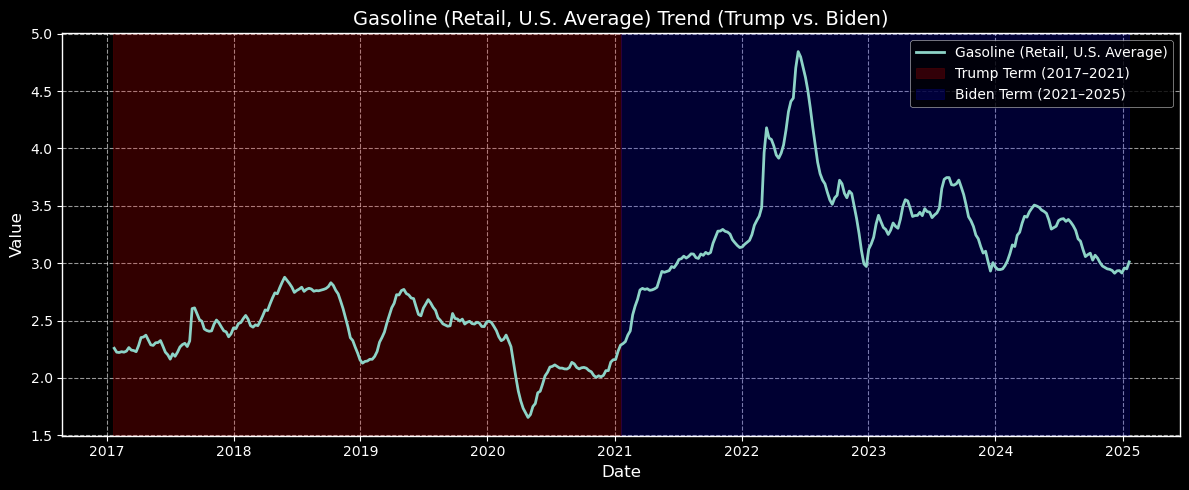

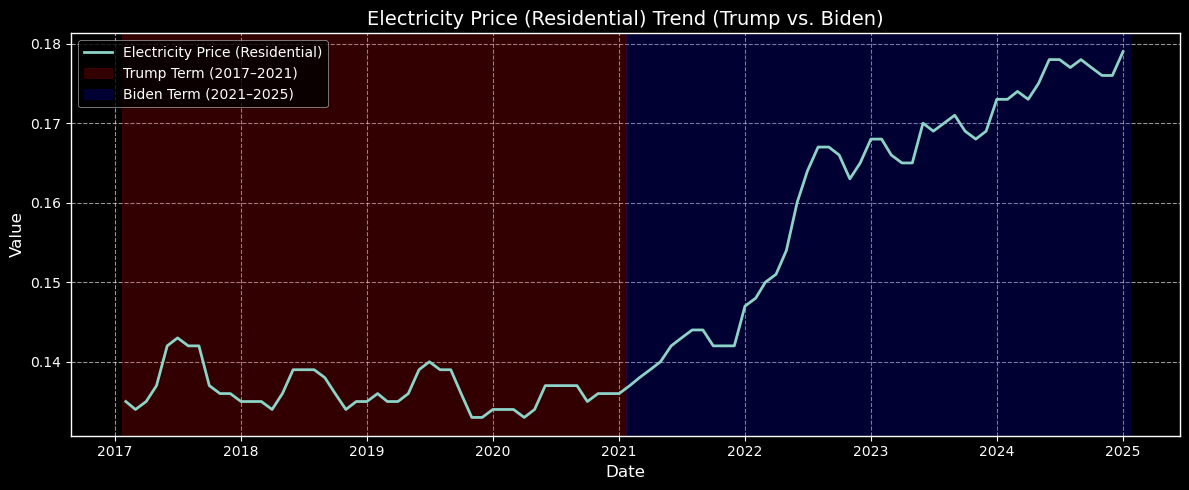

,Metric,Term,Start,End,Average,Median,Std Dev,Max,Min,% Change,Annualized Return (%),Annualized Volatility
0,Crude Oil (WTI),Trump (2017–2021),52.33,53.16,53.00,53.57,11.92,77.41,-36.98,1.59,0.39,41.30
1,Crude Oil (WTI),Biden (2021–2025),53.16,78.56,79.60,77.96,12.62,123.64,52.16,47.78,10.26,43.72
2,Natural Gas,Trump (2017–2021),3.23,2.57,2.68,2.75,0.59,6.24,1.33,-20.43,-5.55,2.03
3,Natural Gas,Biden (2021–2025),2.57,9.86,3.79,2.90,2.12,23.86,1.21,283.66,39.95,7.34
4,"Gasoline (Retail, U.S. Average)",Trump (2017–2021),2.26,2.28,2.38,2.41,0.27,2.88,1.66,1.20,0.30,0.93
5,"Gasoline (Retail, U.S. Average)",Biden (2021–2025),2.30,3.01,3.34,3.29,0.44,4.84,2.30,31.03,6.99,1.52
6,Electricity Price (Residential),Trump (2017–2021),0.14,0.14,0.14,0.14,0.00,0.14,0.13,0.74,0.18,0.01
7,Electricity Price (Residential),Biden (2021–2025),0.14,0.18,0.16,0.17,0.01,0.18,0.14,30.66,6.91,0.05


In [91]:
energy_fuels_metrics = {
    "Crude Oil (WTI)": "DCOILWTICO",                  
    "Natural Gas": "DHHNGSP",                         
    "Gasoline (Retail, U.S. Average)": "GASREGCOVW",  
    "Electricity Price (Residential)": "APU000072610" 
}
plot_of_metrics(energy_fuels_metrics, title="📉 Health Care Price Trends")
detailed_value_summary(energy_fuels_metrics)

#### Health Care Consumer Price Index Metrics

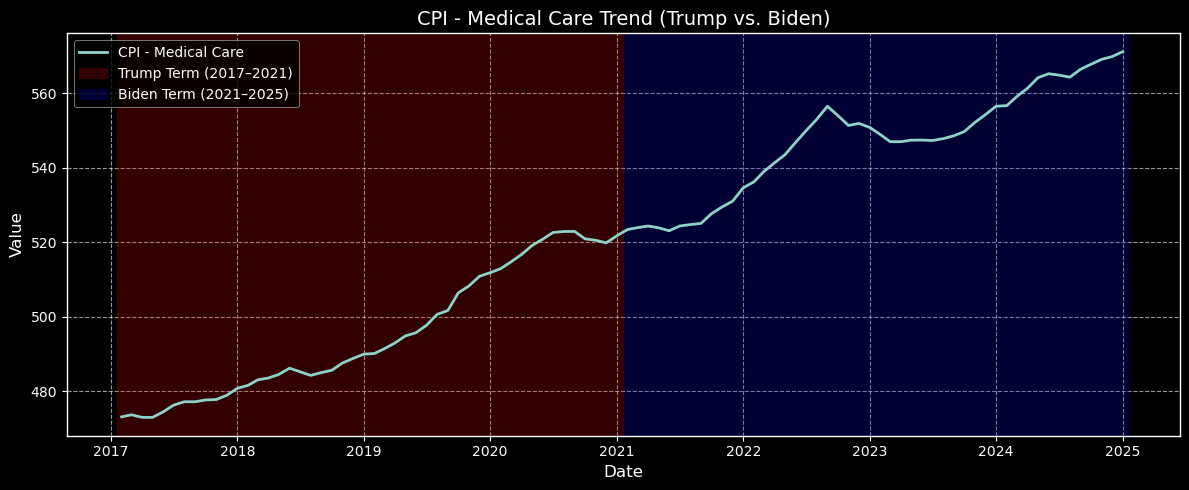

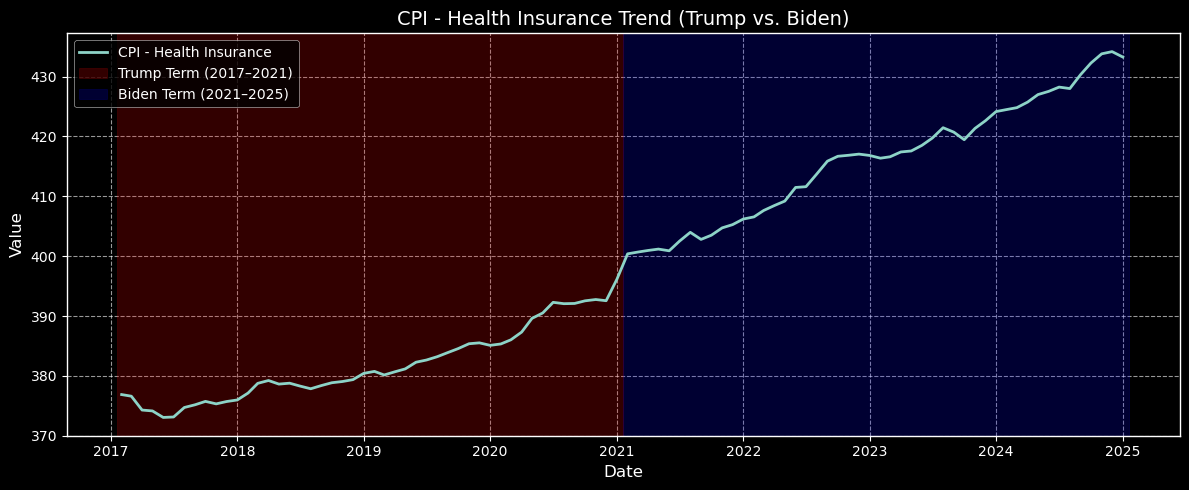

,Metric,Term,Start,End,Average,Median,Std Dev,Max,Min,% Change,Annualized Return (%),Annualized Volatility
0,CPI - Medical Care,Trump (2017–2021),473.14,521.77,495.37,490.06,17.20,522.95,472.98,10.28,2.48,59.59
1,CPI - Medical Care,Biden (2021–2025),523.46,571.23,547.21,548.79,14.62,571.23,523.12,9.13,2.21,50.65
2,CPI - Health Insurance,Trump (2017–2021),376.87,396.13,381.87,380.28,6.21,396.13,373.06,5.11,1.25,21.53
3,CPI - Health Insurance,Biden (2021–2025),400.39,433.26,416.05,416.84,10.20,434.17,400.39,8.21,1.99,35.35


In [92]:
health_metrics = {
    "CPI - Medical Care": "CPIMEDSL",
    "CPI - Health Insurance": "CUSR0000SEMC",
}
plot_of_metrics(health_metrics, title="📉 Health Care Price Index Trends")
detailed_value_summary(health_metrics)

### Food & Agriculture Prices

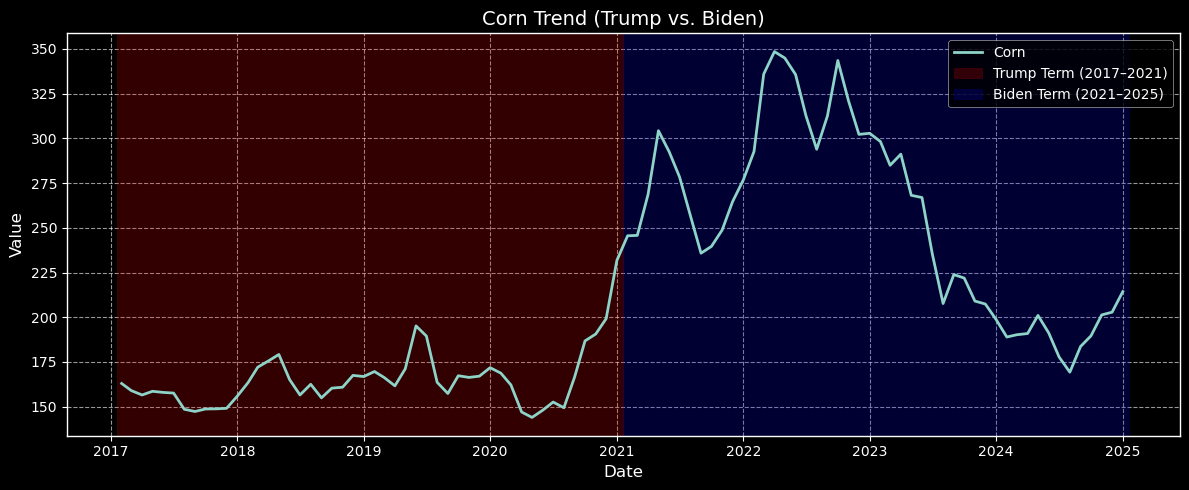

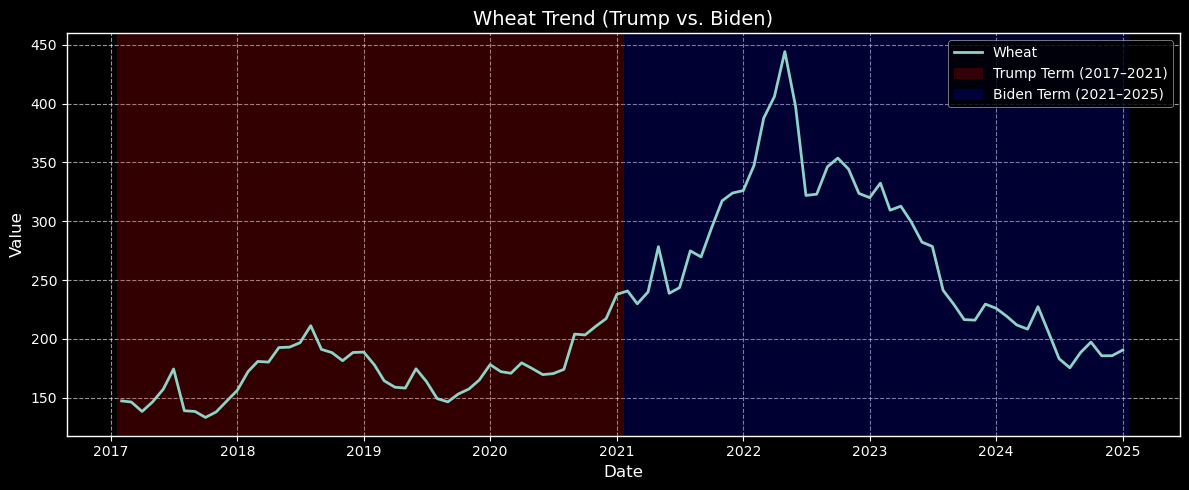

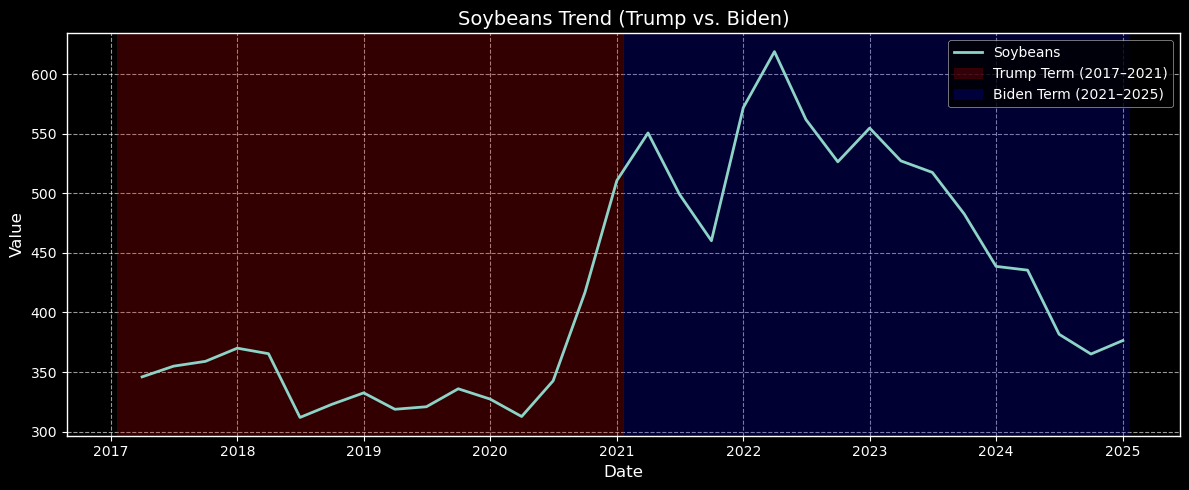

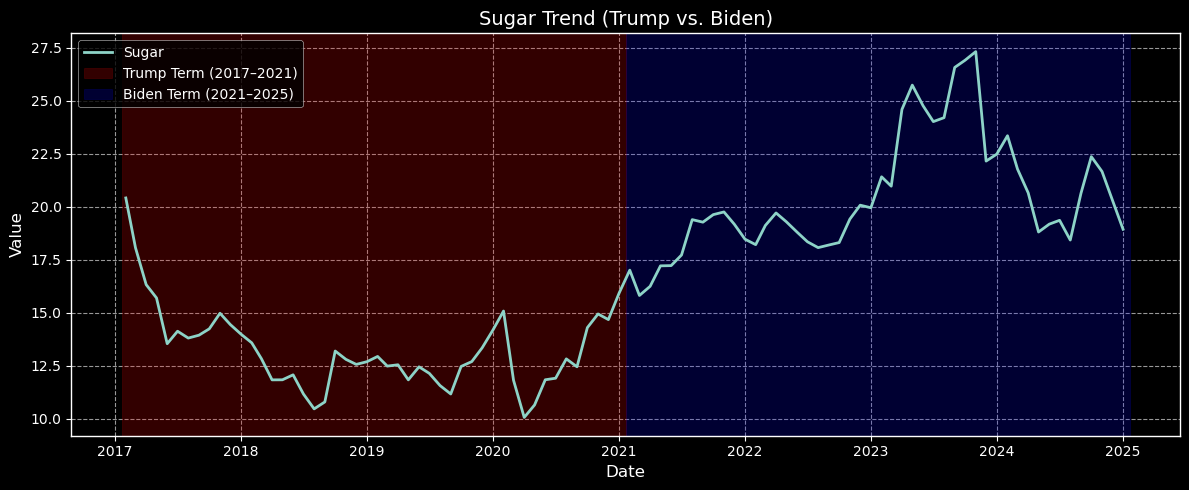

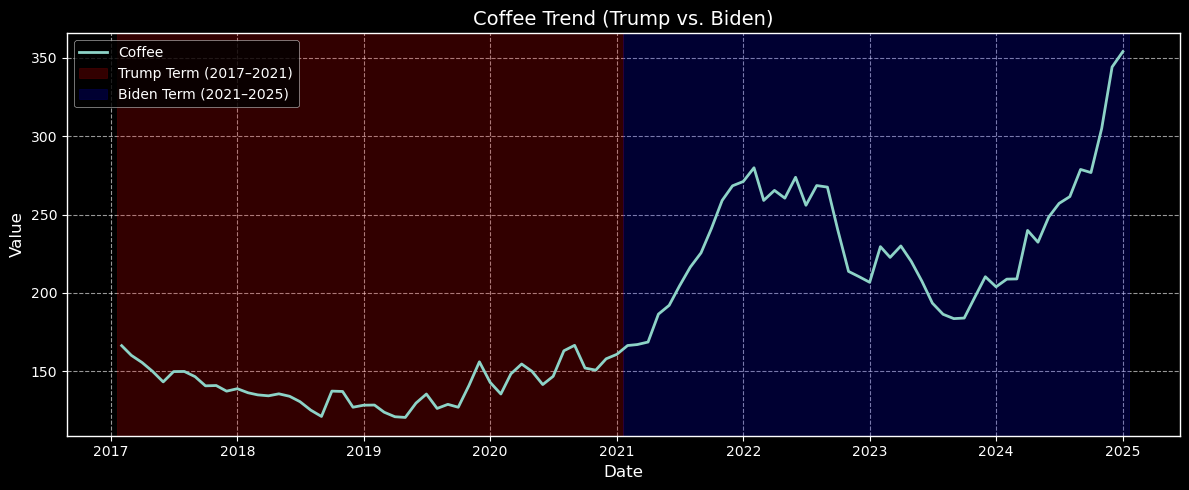

,Metric,Term,Start,End,Average,Median,Std Dev,Max,Min,% Change,Annualized Return (%),Annualized Volatility
0,Corn,Trump (2017–2021),162.96,231.75,165.21,162.74,16.13,231.75,143.99,42.21,9.20,55.87
1,Corn,Biden (2021–2025),245.55,214.36,254.56,252.89,52.25,348.51,169.30,-12.70,-3.34,181.01
2,Wheat,Trump (2017–2021),147.36,237.94,172.15,172.26,23.43,237.94,133.34,61.47,12.73,81.15
3,Wheat,Biden (2021–2025),240.81,190.63,273.89,272.30,67.22,444.16,175.51,-20.84,-5.67,232.84
4,Soybeans,Trump (2017–2021),345.92,510.67,353.00,339.28,49.93,510.67,311.88,47.63,10.23,172.96
5,Soybeans,Biden (2021–2025),550.58,376.43,491.73,508.24,75.97,618.82,365.08,-31.63,-9.07,263.18
6,Sugar,Trump (2017–2021),20.41,15.92,13.23,12.80,1.94,20.41,10.05,-22.00,-6.02,6.71
7,Sugar,Biden (2021–2025),17.00,18.93,20.43,19.51,2.82,27.31,15.81,11.35,2.72,9.77
8,Coffee,Trump (2017–2021),166.35,160.82,141.05,139.79,12.60,166.56,120.55,-3.33,-0.84,43.65
9,Coffee,Biden (2021–2025),166.43,353.93,234.41,229.73,42.11,353.93,166.43,112.66,20.76,145.87


In [93]:
food_ag_metrics = {
    "Corn": "PMAIZMTUSDM",            # U.S. corn price, USD/metric ton
    "Wheat": "PWHEAMTUSDM",           # U.S. wheat price, USD/metric ton
    "Soybeans": "PSOYBUSDQ",          # Soybeans price, USD/metric ton
    "Sugar": "PSUGAISAUSDM",          # International sugar price, USD/metric ton
    "Coffee": "PCOFFOTMUSDM"          # Coffee price, USD/metric ton
}

plot_of_metrics(food_ag_metrics, title="📉 Food & Agriculture Prices")
detailed_value_summary(food_ag_metrics)

### Auto Price Index

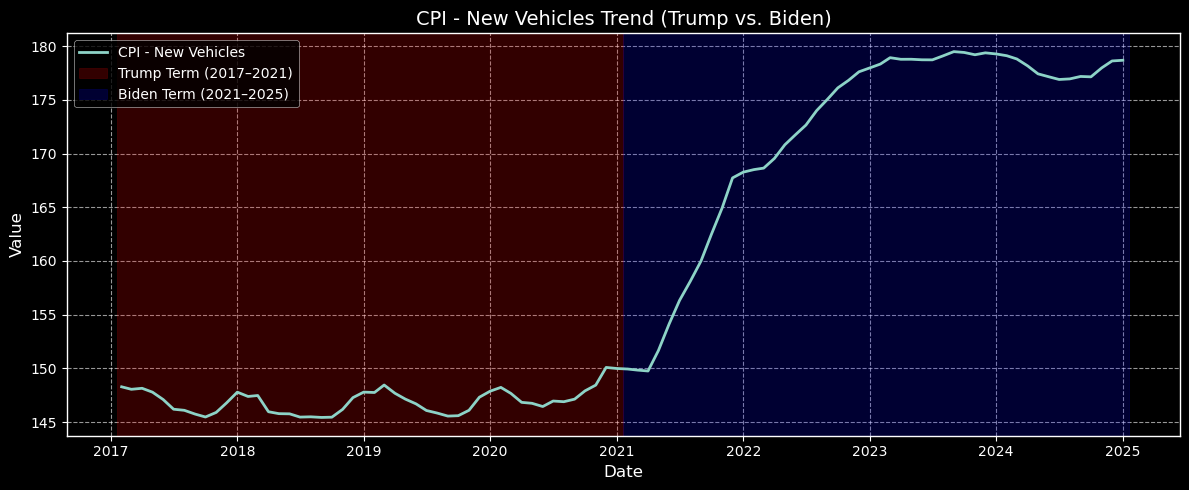

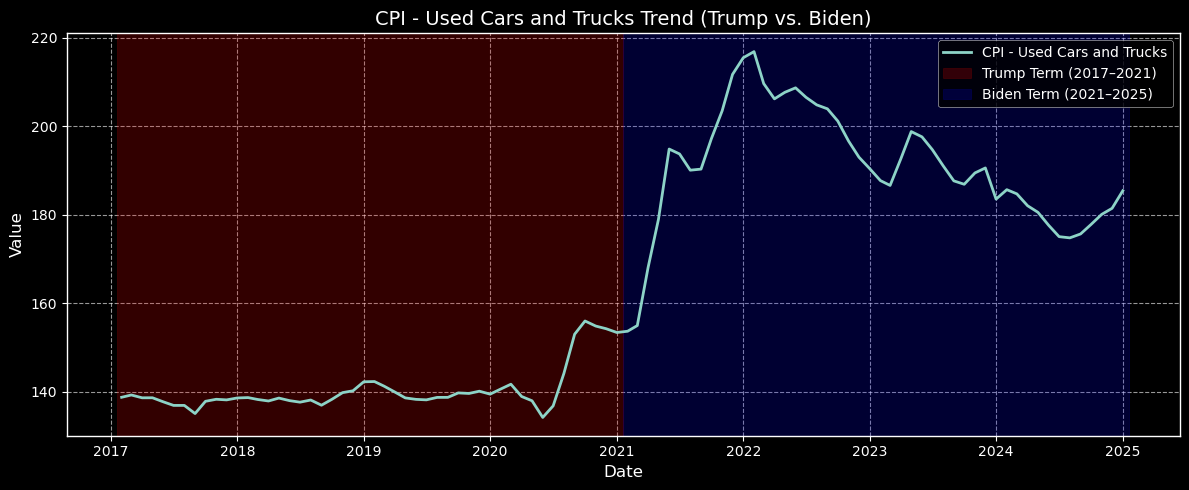

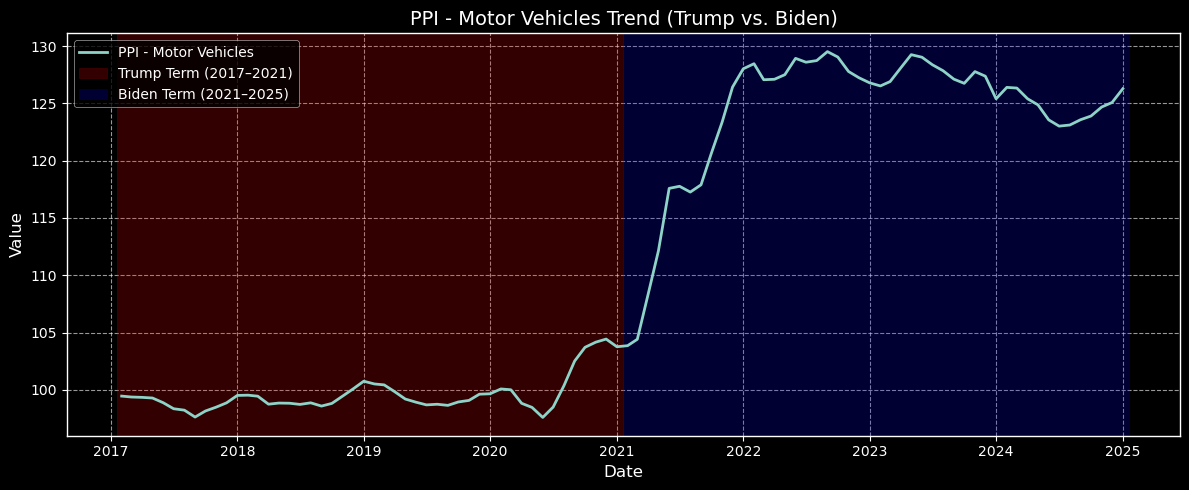

Error fetching or plotting PPI - Motor Vehicle Parts: Bad Request.  Invalid value for variable series_id.  Series IDs should be 25 or less alphanumeric characters.
Error computing summary for PPI - Motor Vehicle Parts: Bad Request.  Invalid value for variable series_id.  Series IDs should be 25 or less alphanumeric characters.


,Metric,Term,Start,End,Average,Median,Std Dev,Max,Min,% Change,Annualized Return (%),Annualized Volatility
0,CPI - New Vehicles,Trump (2017–2021),148.28,149.99,146.96,146.93,1.15,150.09,145.43,1.15,0.29,3.98
1,CPI - New Vehicles,Biden (2021–2025),149.94,178.68,171.98,177.05,9.36,179.49,149.76,19.17,4.48,32.43
2,CPI - Used Cars and Trucks,Trump (2017–2021),138.71,153.36,140.39,138.62,5.09,155.96,134.16,10.56,2.54,17.63
3,CPI - Used Cars and Trucks,Biden (2021–2025),153.65,185.42,190.54,190.37,13.86,216.88,153.65,20.68,4.81,48.03
4,PPI - Motor Vehicles,Trump (2017–2021),99.46,103.77,99.61,99.15,1.59,104.44,97.60,4.33,1.06,5.50
5,PPI - Motor Vehicles,Biden (2021–2025),103.86,126.28,124.19,126.47,6.12,129.51,103.86,21.58,5.01,21.22


In [94]:
auto_price_metrics = {
    "CPI - New Vehicles": "CUSR0000SETA01",      
    "CPI - Used Cars and Trucks": "CUSR0000SETA02",  
    "PPI - Motor Vehicles": "CUSR0000SETA",   
    "PPI - Motor Vehicle Parts": "PCU3363--3363--"  
}
plot_of_metrics(auto_price_metrics, title="Auto Prices")
detailed_value_summary(auto_price_metrics)